<a href="https://colab.research.google.com/github/yolandacolombo/AIC/blob/main/Previs%C3%A3oDeAVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados para previsão de AVC



In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/yolandacolombo/AIC/main/healthcare-dataset-stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Preencher NaN numéricos com média
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

# Preencher NaN categóricos com a moda
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

dataset.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


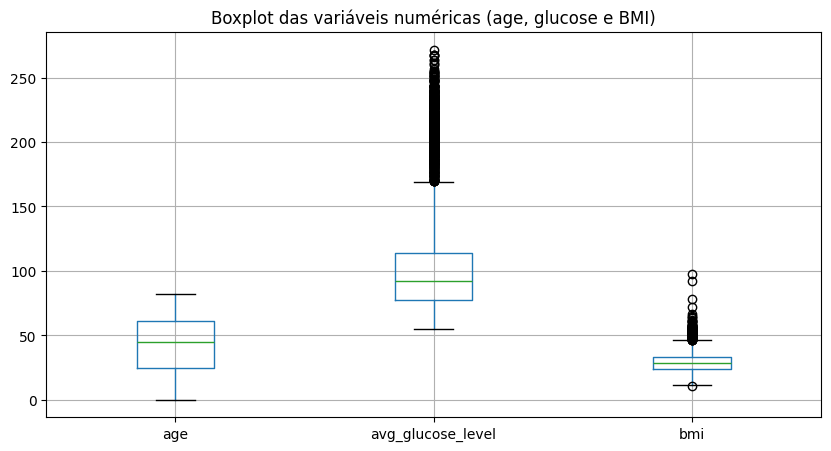

In [7]:
import matplotlib.pyplot as plt
cols_numericas = ['age', 'avg_glucose_level', 'bmi']

dataset[cols_numericas].boxplot(figsize=(10,5))

plt.title("Boxplot das variáveis numéricas (age, glucose e BMI)")
plt.show()

In [8]:
dataset_no_id = dataset.drop(columns=['id'])

one_hot_dataset = pd.get_dummies(dataset_no_id, drop_first=True)
one_hot_dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


In [9]:
y = one_hot_dataset['stroke']
X = one_hot_dataset.drop(columns=['stroke'])

X, y

(       age  hypertension  heart_disease  avg_glucose_level        bmi  \
 0     67.0             0              1             228.69  36.600000   
 1     61.0             0              0             202.21  28.893237   
 2     80.0             0              1             105.92  32.500000   
 3     49.0             0              0             171.23  34.400000   
 4     79.0             1              0             174.12  24.000000   
 ...    ...           ...            ...                ...        ...   
 5105  80.0             1              0              83.75  28.893237   
 5106  81.0             0              0             125.20  40.000000   
 5107  35.0             0              0              82.99  30.600000   
 5108  51.0             0              0             166.29  25.600000   
 5109  44.0             0              0              85.28  26.200000   
 
       gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
 0            True         False

In [10]:
# Importando biblioteca de separação de treino / teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [11]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3897,4.00,0,0,90.42,16.2,True,False,False,False,False,False,True,False,False,False,False
576,29.00,0,0,207.58,22.8,True,False,False,False,True,False,False,True,False,False,True
4013,44.00,1,0,91.28,26.5,True,False,True,False,True,False,False,False,False,True,False
4536,68.00,1,0,150.74,40.3,False,False,True,False,True,False,False,True,False,False,False
1180,62.00,0,0,82.57,36.0,False,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,43.00,0,0,88.00,30.6,True,False,True,False,False,False,False,False,False,True,False
466,61.00,1,0,170.05,60.2,False,False,True,False,True,False,False,False,False,False,True
3092,1.16,0,0,97.28,17.8,False,False,False,False,False,False,True,True,False,False,False
3772,80.00,0,0,196.08,31.0,True,False,True,False,False,True,False,False,True,False,False


In [12]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

resultados = []

modelos = [
    ("Árvore de Decisão", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Regressão Logística", LogisticRegression(max_iter=2000))
]

for nome, modelo in modelos:
    inicio = time.time()
    modelo.fit(X_train, y_train)
    fim = time.time()

    y_pred = modelo.predict(X_test)

    resultados.append({
        "Modelo": nome,
        "Acurácia": accuracy_score(y_test, y_pred),
        "Precisão": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "Tempo de Processamento": fim - inicio
    })



In [34]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Acurácia,Precisão,Recall,F1-score,Tempo de Processamento
0,Árvore de Decisão,0.902805,0.180851,0.191011,0.185792,0.042265
1,Random Forest,0.941944,0.000000,0.000000,0.000000,0.759028
2,Regressão Logística,0.942596,1.000000,0.011236,0.022222,0.251695


In [13]:
from sklearn.metrics import classification_report

for nome, modelo in modelos:
    print(f"\n===== {nome} =====")
    preds = modelo.predict(X_test)
    print(classification_report(y_test, preds, zero_division=0))


===== Árvore de Decisão =====
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.16      0.18      0.17        89

    accuracy                           0.90      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.90      0.90      0.90      1533


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533


===== Regressão Logística =====
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51    